In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings('ignore') 
%matplotlib inline

# CSV 파일 읽기
bostonDF = pd.read_csv('house_price.csv')


# 데이터 크기 출력
print('Boston 데이터셋 크기:', bostonDF.shape)

# 데이터프레임 출력 
bostonDF.head()


Boston 데이터셋 크기: (506, 15)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT.MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


- CRIM: 지역별 범죄 발생률
- ZN: 25,000평방피트를 초과하는 거주 지역의 비율
- NDUS: 비상업 지역 넓이 비율
- CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
- NOX: 일산화질소 농도
- RM: 거주할 수 있는 방 개수
- AGE: 1940년 이전에 건축된 소유 주택의 비율
- DIS: 5개 주요 고용센터까지의 가중 거리
- RAD: 고속도로 접근 용이도
- TAX: 10,000달러당 재산세율
- PTRATIO: 지역의 교사와 학생 수 비율
- B: 지역의 흑인 거주 비율
- LSTAT: 하위 계층의 비율
- MEDV: 본인 소유의 주택 가격(중앙값)
- 각 컬럼별로 주택가격에 미치는 영향도를 조사

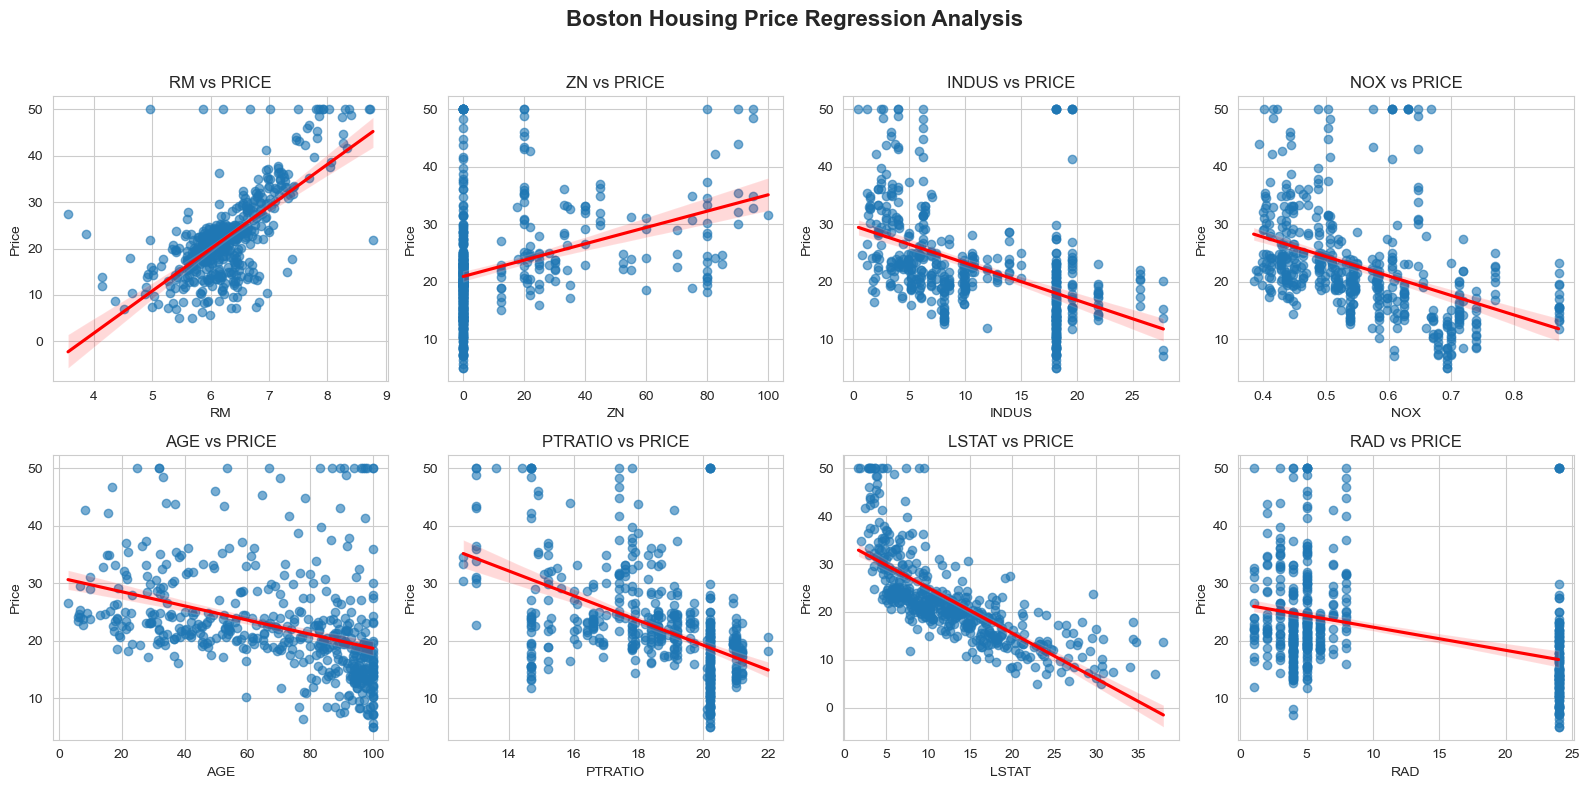

In [81]:
sns.set_style("whitegrid")
# 2개의 행과 4개의 열을 가진 subplots 생성
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)

# 회귀 분석에 사용할 피처 리스트
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']

# 각 피처별 산점도 + 회귀선 플로팅
for i, feature in enumerate(lm_features):
    row = i // 4
    col = i % 4
    
    sns.regplot(
        x=feature, 
        y='MEDV', 
        data=bostonDF, 
        ax=axs[row][col],
        scatter_kws={'alpha': 0.6}, 
        line_kws={'color': 'red'}  
    )
    
    axs[row][col].set_title(f"{feature} vs PRICE", fontsize=12)  
    axs[row][col].set_xlabel(feature, fontsize=10)
    axs[row][col].set_ylabel("Price", fontsize=10) 

fig.suptitle("Boston Housing Price Regression Analysis", fontsize=16, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


학습과 테스트 데이터로 분리하고 학습/예측/평가 수행

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X_data = bostonDF.drop(['MEDV'], axis=1, inplace=False)
y_target = bostonDF['MEDV']
X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))


MSE : 13.483 , RMSE : 3.672
Variance score : 0.811


In [83]:
print('절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 42.27785430272297
회귀 계수값: [ -0.1  -0.    0.1   2.4 -16.6   0.7  -0.   -0.9   0.2  -0.   -0.5   0.
  -0.5  13. ]


In [84]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. index가 칼럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns )
coeff.sort_values(ascending=False)

CAT.MEDV    13.0
CHAS         2.4
RM           0.7
RAD          0.2
INDUS        0.1
ZN          -0.0
B            0.0
AGE         -0.0
TAX         -0.0
CRIM        -0.1
LSTAT       -0.5
PTRATIO     -0.5
DIS         -0.9
NOX        -16.6
dtype: float64

In [85]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['MEDV']
X_data = bostonDF.drop(['MEDV'],axis=1,inplace=False)
lr = LinearRegression()

# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE 구함. 
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [ -6.54 -15.62 -23.68 -44.52 -16.45]
 5 folds 의 개별 RMSE scores :  [2.56 3.95 4.87 6.67 4.06]
 5 folds 의 평균 RMSE : 4.421 
